<a href="https://colab.research.google.com/github/AishaLichtner/projects-2019/blob/master/Copy_of_Assignment_3_Aisha_Lichtner_Bajjaoui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3rd Assigment: Aisha Lichtner-Bajjaoui

Data: https://www.kaggle.com/parthachakraborty/pneumonia-chest-x-ray/downloads/All.zip

This zip file contains 5856 Chest X-Ray images as jpeg format and a CSV file(GTruth.csv). The CSV file contains ground truth information for images."0" means Pneumonia case and "1" means normal case.

The assigment has two parts:

+ Developing a CNN model to classify X-ray images with high accuracy.
+ To explore classifier explanation methods.

In [0]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import tensorflow.keras
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split



In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Download the data in a directory called `All`.

In [0]:
df=pd.read_csv('My Drive/All/GTruth.csv')
df.head()

,Id,Ground_Truth
0,643781546,1
1,540270208,0
2,585452583,1
3,341665171,0
4,940983956,1


In [0]:
kv_dict= dict(zip(df['Id'].values,df['Ground_Truth'].values))
#kv_dict

In [0]:
#Reading Image data and converting it into pixels and separating class labels
Data=[]
Label=[]
directory='My Drive/All'

for filename in os.listdir(directory) :
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        
        Label.append(kv_dict.get(int(filename.split('.')[0])))
        filename=os.path.join(directory, filename)
        im=image.load_img(filename,target_size=(224, 224))
        im=np.reshape(im,(224,224,3))
        im=im.astype('float32') / 255
        Data.append(im)
    else:
        continue    

In [0]:
#Train Test Split
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(Label), test_size=0.2, random_state=42,stratify=Label)

#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [0]:
img_width=224
img_height=224

from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)
    
del Data

Using TensorFlow backend.


## Exercise 1

+ Design and train a convolutional neural network for classifying X-ray images. 
+ Report the final (train and test) accuracy of your model.
+ Plot the confusion matrix.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(activation = 'relu', units = 34))
model.add(Dense(activation = 'sigmoid', units = 1))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv

In [0]:
history = model.fit(X_train, y_train, epochs=10, batch_size=250)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4684/4684 [==============================] - 16s 3ms/step - loss: 0.5891 - acc: 0.7045
Epoch 2/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.3750 - acc: 0.8288
Epoch 3/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.2292 - acc: 0.9076
Epoch 4/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.1725 - acc: 0.9351
Epoch 5/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.1513 - acc: 0.9402
Epoch 6/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.1460 - acc: 0.9432
Epoch 7/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.1268 - acc: 0.9524
Epoch 8/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.1186 - acc: 0.9552
Epoch 9/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0.1291 - acc: 0.9513
Epoch 10/10
4684/4684 [==============================] - 6s 1ms/step - loss: 0

I get a train accuracy of 0.9 

In [0]:
score, acc = model.evaluate(X_test,y_test)

235/235 [==============================] - 1s 2ms/step


and a test accuracy of 0.8

In [0]:
X_predicted = model.predict(X_test)
X_predicted

array([[0.9999377 ],
       [0.0045656 ],
       [0.9967762 ],
       [0.9999546 ],
       [0.99990284],
       [0.9965193 ],
       [0.999781  ],
       [0.00492796],
       [0.4819889 ],
       [0.9975405 ],
       [0.9996253 ],
       [0.999997  ],
       [0.9997189 ],
       [0.99007255],
       [0.00596836],
       [0.04230464],
       [0.999956  ],
       [0.99516284],
       [0.99879295],
       [0.0060938 ],
       [0.97448814],
       [0.00809917],
       [0.99977833],
       [0.53501517],
       [0.9999985 ],
       [0.99999964],
       [0.00322673],
       [0.014734  ],
       [0.08051968],
       [0.99018407],
       [0.99999976],
       [0.9999998 ],
       [0.5416864 ],
       [0.7324576 ],
       [0.9998994 ],
       [0.99998325],
       [0.03758037],
       [0.9852803 ],
       [0.00207987],
       [0.9996926 ],
       [0.99903274],
       [0.0094848 ],
       [0.99995404],
       [0.99898314],
       [0.9927298 ],
       [0.07611778],
       [0.99995565],
       [0.004

In [0]:
new_x =[]
for x in X_predicted:
  if x > 0.5:
    new_x.append(1)
  else:
    new_x.append(0)

I got better results by putting 0.6 as a bound, but I dont know if the model might be biased and since it did not improve the number of unrecognized diseases, I changed it back to 0.5.

In [0]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = new_x

confusion_matrix(y_true, y_pred)

array([[ 57,   7],
       [  4, 167]])

## Exercise 2

SHAP (SHapley Additive exPlanations) (https://github.com/slundberg/shap) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

Some of the methods implemented in SHAP are designed to explain image classifications. Apply these methods to your model and make a critical review of their results.

In [0]:
# your code here
!pip install shap 
import shap

     |████████████████████████████████| 235kB 3.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/93/3f/4a/331cf71b5043416aeba0df795e7c204c7ad277673f1938d11b
Successfully built shap


In [0]:
import shap
import numpy as np

# selecting a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explaining predictions of the model on  images
expl = shap.DeepExplainer(model, background)


shap_values = expl.shap_values(X_test[1:10])

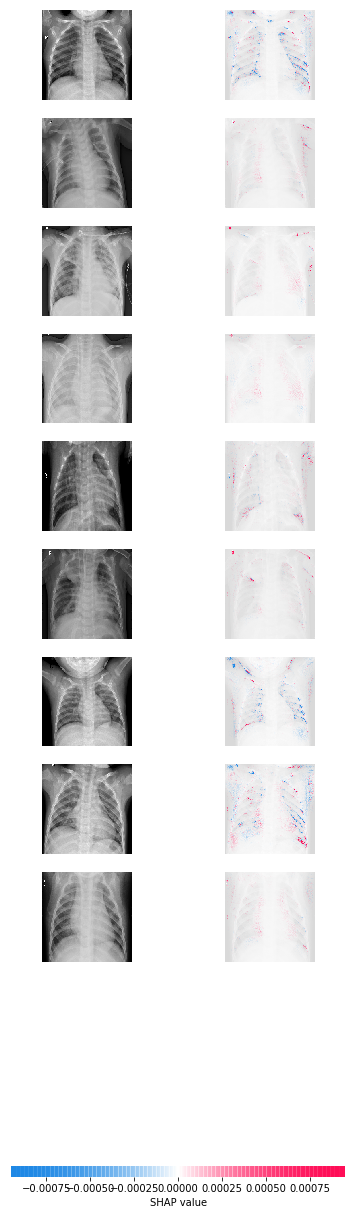

In [0]:
shap.image_plot(shap_values, X_test[1:10])

The SHAP Deep Explainer tells you which pixels were important for the classification of the pictures.  Pink indicates  parts of the image that were important for the  classification and the blue indicates parts that did not help the classification. 
We observe that the parts that are blue are the "inner parts" where pneunomia can be found so it makes sense that those are the parts that are considered important.
These results agree with how pneunomia is classified by doctors as well.